# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [1]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [2]:
import pandas as pd

Import project files

In [3]:
#import sys
#sys.path.append("utils")
# from utils import models

In [4]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uploading data

In [5]:
train_file = 'data/df_filtered.csv'

Getting dataframe

In [6]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 31.2 ms
Wall time: 47 ms


## 1+2) Lemmatizing and protecting stopwords

Defining the word dictionary

In [7]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 24.5 s
Wall time: 36.9 s


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Clustering

eps 1.8145278898835595
CPU times: total: 3.75 s
Wall time: 3.27 s


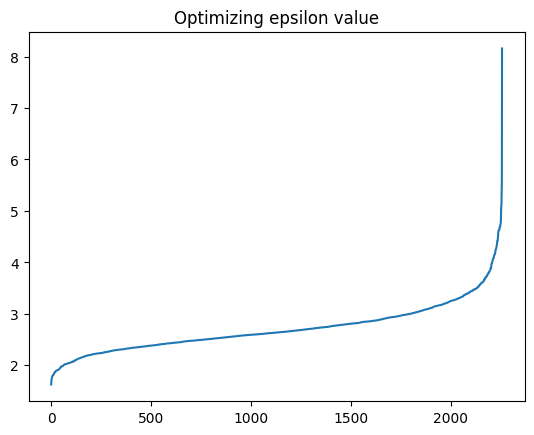

In [8]:
%%time
embedded_dict = cluster_utils.embed_corpus(word_list)
cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [9]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

NameError: name 'dist_dict_2' is not defined

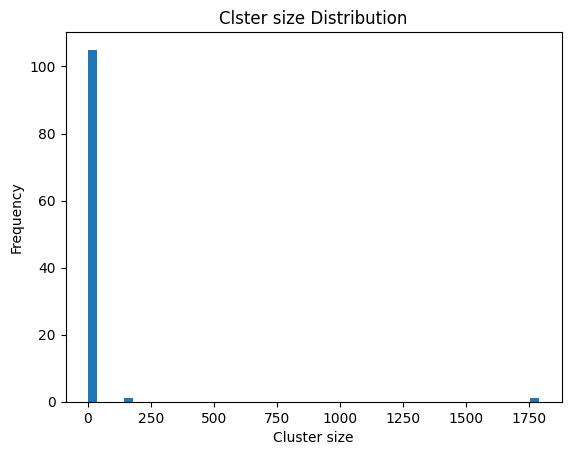

In [10]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

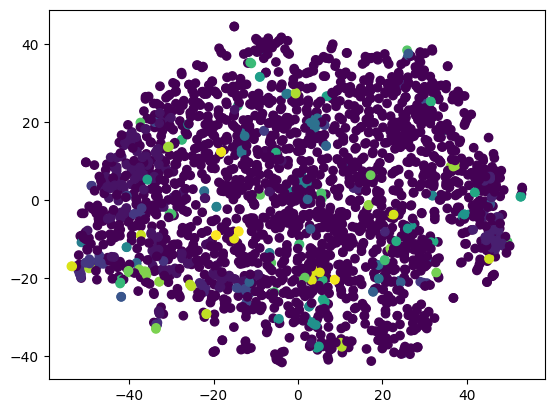

CPU times: total: 1min
Wall time: 31.4 s


In [11]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.056689203


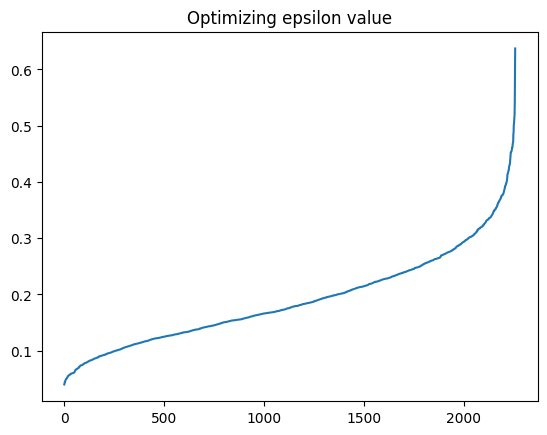

In [12]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

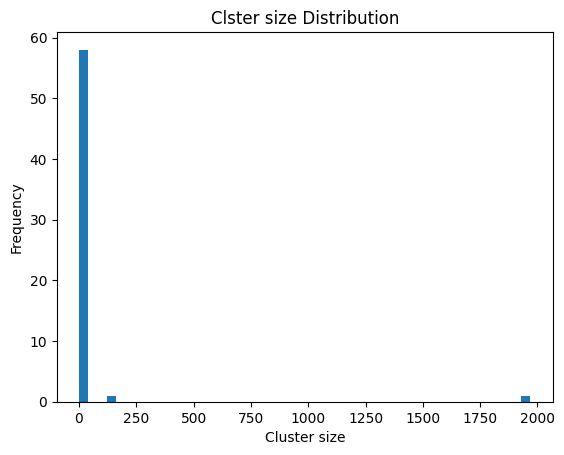

In [13]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

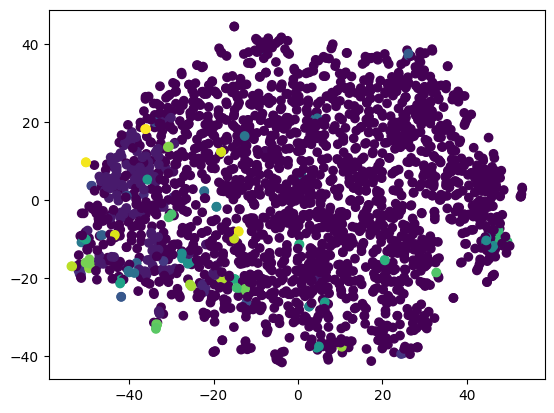

CPU times: total: 1min
Wall time: 31.2 s


In [14]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [15]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

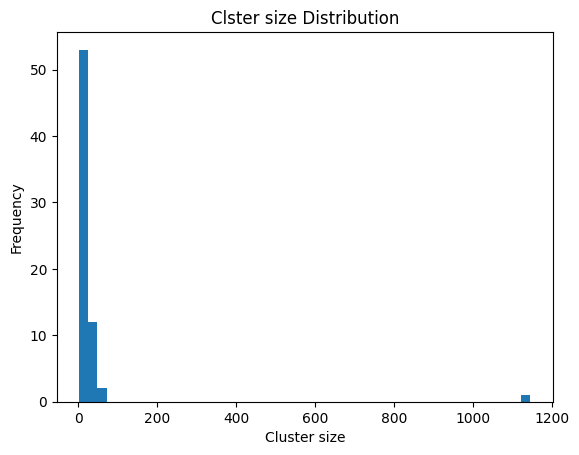

In [16]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

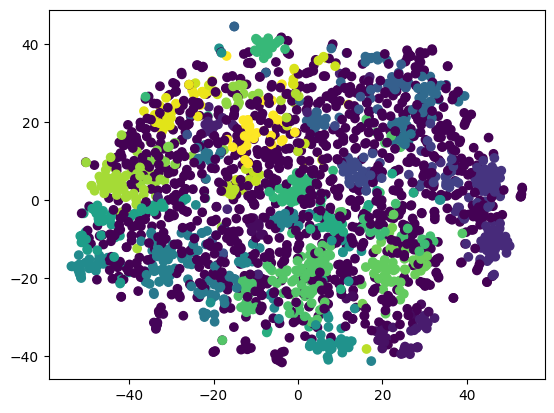

In [17]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [18]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 107 clusters
Cosine distance:	 60 clusters
HDBSCAN clustering:	 68 clusters


Plotting Jaccard index histogram

In [19]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['chocolate', 'banana', 'love', 'hi', 'cola']

Getting distance threshold

In [20]:
threshold = cluster_utils.define_max_threshold()
threshold

sim_list_best 0.82521856
sim_list_worst 0.56748897


0.3036462366580963

### 3.2) replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [21]:
######################### TEMP #######################
df = df[:30]

Starting average Jaccard index: 0.10110055730184907
Distance threshold: 0.3036462366580963
distance: 0.117537186 	replacing ['interest', 'potential'] in significant
distance: 0.13134822 	replacing ['struggle', 'waste'] in problems
distance: 0.16331552 	replacing ['forward', 'ahead', 'return'] in starting
distance: 0.14364523 	replacing ['nashville', 'brooklyn'] in l.a.
distance: 0.3408029 the next cluster is too wide and wont be replaced: ['five', 'many', 'make', 'remember', 'mess', 'high', 'else', 'might', 'step', 'less', 'talk', 'second', 'yes', 'soon', 'call', 'anyone', 'today', 'fly', 'certainly', 'another', 'absolutely', 'go', 'bring', 'reason', 'way', 'finally', 'always', 'really', 'like', 'four', 'anybody', 'maybe', 'actually', 'give', 'away', 'although', 'whether', 'need', 'possibly', 'let', 'already', 'break', 'stupid', 'wonder', 'lot', 'perhaps', 'catch', 'especially', 'sure', 'doubt', 'twice', 'blow', 'fill', 'everything', 'wrong', 'think', 'obviously', 'whole', 'apparently'

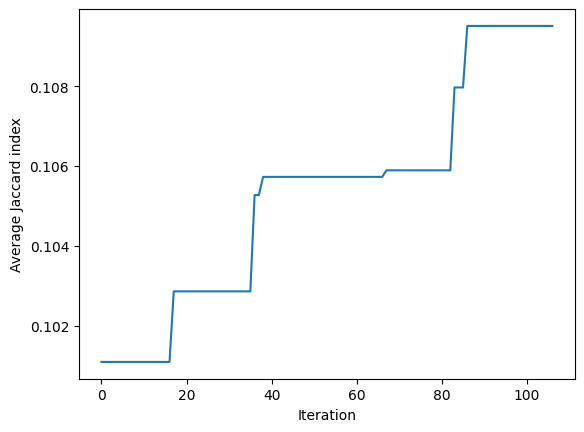

In [22]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [23]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...
5,334,awesome: this is probably the best essay i hav...,1,25,great : this is probably the fun essay i have ...,[great] (this) (is) probably (the) [great] ess...
6,370,good deal and fast shipping: i bought this boo...,1,27,fun trade and fast shipping : i free this book...,[fun] [trade] (and) fast shipping: (i) {buy} (...
7,373,love scarpetta: you have to love the scarpetta...,1,21,love scarpetta : you have to love the scarpett...,love scarpetta: (you) (have) (to) love (the) s...
8,414,gift: i bought this for a christmas present fo...,1,25,gift : i free this for a christmas present for...,gift: (i) {buy} (this) (for) (a) christmas pre...
9,461,just awful: this was possibly the worst book i...,0,25,just awful : this was possibly the like book i...,(just) awful: (this) (was) possibly (the) {bad...


#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.10110055730184907
Distance threshold: 0.3036462366580963
distance: 0.117537186 	replacing ['interest', 'potential'] in significant
distance: 0.13134822 	replacing ['struggle', 'waste'] in problems
distance: 0.11843895 	replacing ['forward', 'ahead'] in starting
distance: 0.33559543 the next cluster is too wide and wont be replaced: ['five', 'many', 'make', 'remember', 'people', 'else', 'might', 'step', 'talk', 'second', 'yes', 'soon', 'call', 'anyone', 'today', 'certainly', 'another', 'absolutely', 'go', 'bring', 'reason', 'way', 'bad', 'finally', 'always', 'really', 'like', 'girl', 'four', 'anybody', 'maybe', 'actually', 'give', 'although', 'whether', 'need', 'possibly', 'let', 'different', 'nice', 'already', 'boy', 'stupid', 'guy', 'wonder', 'long', 'crazy', 'lot', 'perhaps', 'especially', 'sure', 'doubt', 'explain', 'damn', 'everything', 'wrong', 'think', 'obviously', 'whole', 'apparently', 'next', 'tell', 'still', 'however', 'old', 'totally', 'good

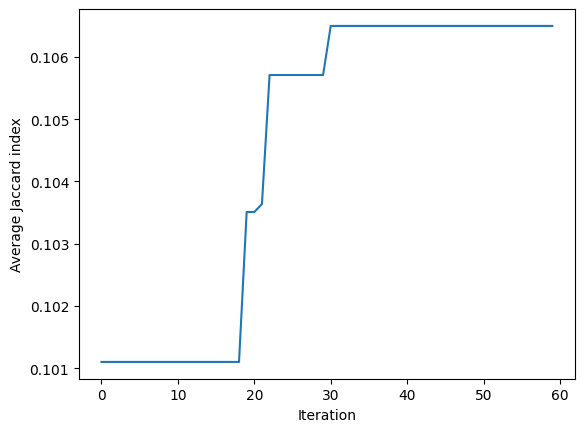

In [24]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [25]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was exciting ! ! ! : i like it . it was ver...,(it) (was) [exciting] (i) like (it.) (it) (was...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this product was just wh...,{docker} (do) (the) job.: (this) [tools] (was)...
5,334,awesome: this is probably the best essay i hav...,1,25,exciting : this is probably the good essay i h...,[exciting] (this) (is) probably (the) [excitin...
6,370,good deal and fast shipping: i bought this boo...,1,27,good deal and fast shipping : i free this book...,[fun] [trade] (and) fast shipping: (i) {buy} (...
7,373,love scarpetta: you have to love the scarpetta...,1,21,love scarpetta : you have to love the scarpett...,love scarpetta: (you) (have) (to) love (the) s...
8,414,gift: i bought this for a christmas present fo...,1,25,gift : i free this for a christmas present for...,gift: (i) {buy} (this) (for) (a) christmas pre...
9,461,just awful: this was possibly the worst book i...,0,25,just awful : this was possibly the bad book i ...,(just) awful: (this) (was) possibly (the) {bad...


#### 3.2.3) Based on HDBSCAN clustering

Starting average Jaccard index: 0.10110055730184907
Distance threshold: 0.3036462366580963
distance: 0.27759197 	replacing ['scary', 'stupid', 'annoying', 'damn', 'creepy', 'hilarious', 'dumb', 'kinda', 'silly', 'funny', 'sick', 'weird'] in crazy
distance: 0.34699535 the next cluster is too wide and wont be replaced: ['forward', 'st', 'second', 'class', 'minute', 'course', 'college', 'point', 'date', 'practice', 'schedule', 'surprise', 'present', 'place', 'chance']
distance: 0.38760644 the next cluster is too wide and wont be replaced: ['nashville', 'shia', 'city', 'india', 'portuguese', 'west', 'boston', 'french', 'border', 'state', 'former', 'seal', 'africa', 'east', 'sandy', 'japan', 'catholic', 'british', 'birmingham', 'western', 'thailand', 'marine', 'native', 'german', 'australian', 'region', 'jewish', 'temple', 'brooklyn', 'american', 'christians', 'country', 'south', 'african', 'soldier', 'uk', 'elementary']
distance: 0.35157076 the next cluster is too wide and wont be replaced

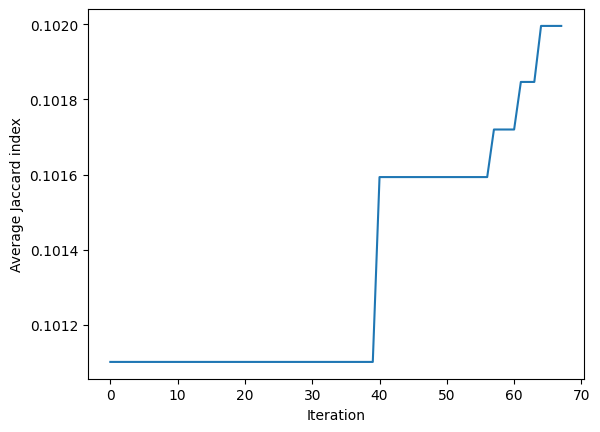

In [26]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

In [27]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship seems and was in excellen...,textbook: book {ship} [seems] (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) [exciting] (i) like (it.) (it) (was...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...
5,334,awesome: this is probably the best essay i hav...,1,25,awesome : this is probably the good essay i ha...,[exciting] (this) (is) probably (the) [excitin...
6,370,good deal and fast shipping: i bought this boo...,1,27,good deal and fast shipping : i buy this book ...,[fun] [trade] (and) fast shipping: (i) {buy} (...
7,373,love scarpetta: you have to love the scarpetta...,1,21,love scarpetta : you have to love the scarpett...,love scarpetta: (you) (have) (to) love (the) s...
8,414,gift: i bought this for a christmas present fo...,1,25,gift : i buy this for a christmas present for ...,gift: (i) {buy} (this) (for) (a) christmas pre...
9,461,just awful: this was possibly the worst book i...,0,25,just awful : this was possibly the bad book i ...,(just) awful: (this) (was) possibly (the) {bad...


Looking at the histogram again

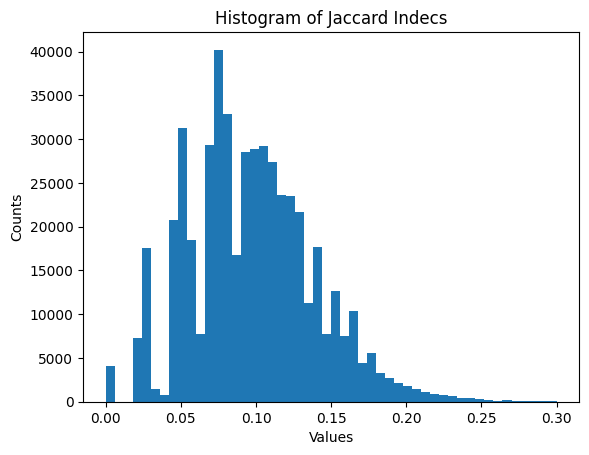

CPU times: total: 8.77 s
Wall time: 9.34 s


In [ ]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

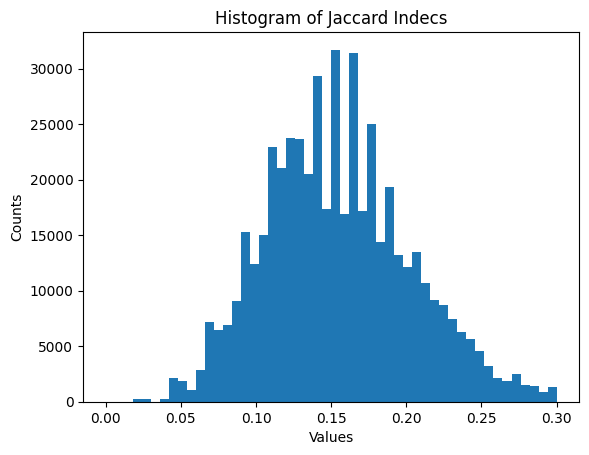

CPU times: total: 11.2 s
Wall time: 14 s


In [ ]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

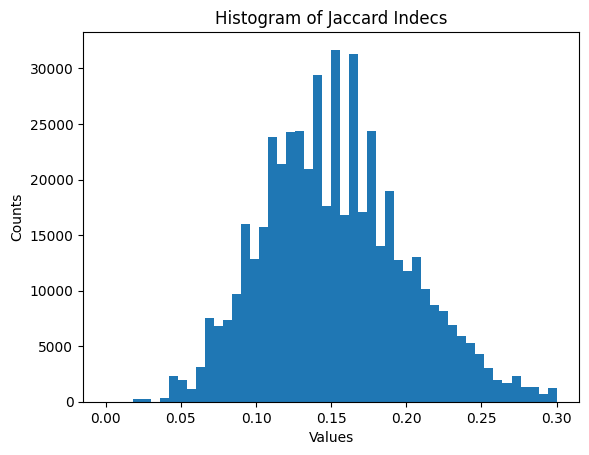

CPU times: total: 10.5 s
Wall time: 12 s


In [ ]:
%%time
nlp_utils.plot_jaccard_hist(df_3, 'anon_txt')

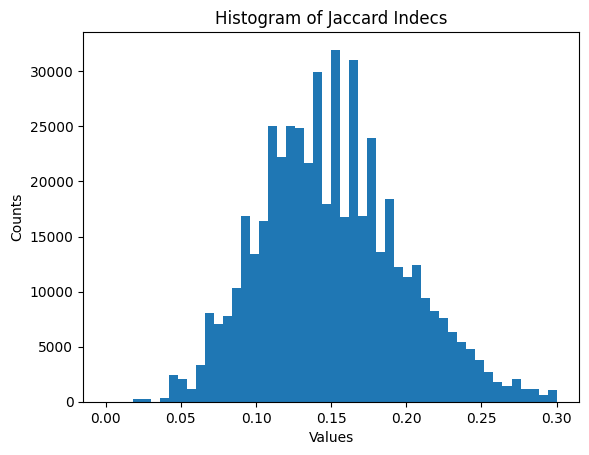

CPU times: total: 9.19 s
Wall time: 9.39 s


In [ ]:
%%time
nlp_utils.plot_jaccard_hist(df_4, 'anon_txt')

In [ ]:
print('Eucolidian dist:\t', df_2.iloc[3, 4])
print('Cosine dist:\t\t', df_3.iloc[3, 4])
print('HDNSCAN:\t\t\t', df_4.iloc[3, 4])

Eucolidian dist:	 it was great ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the good .
Cosine dist:		 it was exciting ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the night .
HDNSCAN:			 it was great ! ! ! : i like it . it was very cool to read about vampire and other legendary crature of the night .


In [ ]:
print('Eucolidian dist:\t', df_2.iloc[3, 5])
print('Cosine dist:\t\t', df_3.iloc[3, 5])
print('HDNSCAN:\t\t\t', df_4.iloc[3, 5])

Eucolidian dist:	 (it) (was) [exciting] (i) like (it.) (it) (was) (very) cool (to) [answer] (about) {vampire} (and) (other) legendary {crature} (of) (the) [fun] 
Cosine dist:		 (it) (was) [exciting] (i) like (it.) (it) (was) (very) cool (to) [answer] (about) {vampire} (and) (other) legendary {crature} (of) (the) [fun] 
HDNSCAN:			 (it) (was) [exciting] (i) like (it.) (it) (was) (very) cool (to) [answer] (about) {vampire} (and) (other) legendary {crature} (of) (the) [fun] 


## 4) Force anonymity

### Testing

In [ ]:
anonym_utils.get_anonym_degree(['i love banana', 'he loves chocolate', 'she loves chocolate'])

(1, [[0]])

In [ ]:
anonym_utils.get_anonym_degree(['i love banana', 'he loves chocolate', 'she loves chocolate'], min_k=3)

(3, [[1, 2], [0]])

In [ ]:
k = 3

### Get anonymity degree

Before replacement

In [ ]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 1005 	number of all documents: 1007


After replacement

In [ ]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 1005 	number of all documents: 1007


### Getting Bag of Words representation

In [ ]:
vecs, voc = anonym_utils.get_bow(df_2['anon_txt'])

In [ ]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(vecs=vecs)
print('Current k:', curr_k, '\tnumber of documents:', len(non_anon_indexes))

Current k: 1 	number of documents: 1005


#### Testing

In [ ]:
sparse_mat, df = anonym_utils.get_bow(['I love banana', 'he loves choco', 'you love choco'], create_df=True)

['love banana', 'love choco', 'love choco']


In [ ]:
np_mat = sparse_mat.toarray()
np_mat

array([[1, 0, 1],
       [0, 1, 1],
       [0, 1, 1]], dtype=int64)

In [ ]:
df

,banana,choco,love
0,1,0,1
1,0,1,1
2,0,1,1


### Finding the nearest k neighbors

In [ ]:
k=2
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala', 'lalalala'], k=k)

[[0, 3], [1, 2], [4, 5]]

In [ ]:
k=3
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala', 'lalalala'], k=k)

[[0, 3, 2], [1, 5, 4]]

The algorithm is greedy

In [ ]:
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala'], k=3)

[[0, 3, 2], [1, 4]]

Running on data

#### k=2

In [ ]:
anonym_utils.get_nearest_neighbors(vecs.toarray(), k=2)

[[0, 120],
 [1, 625],
 [2, 203],
 [3, 982],
 [4, 520],
 [5, 84],
 [6, 498],
 [7, 895],
 [8, 321],
 [9, 316],
 [10, 358],
 [11, 471],
 [12, 862],
 [13, 805],
 [14, 125],
 [15, 999],
 [16, 353],
 [17, 136],
 [18, 177],
 [19, 552],
 [20, 462],
 [21, 461],
 [22, 928],
 [23, 979],
 [24, 558],
 [25, 850],
 [26, 369],
 [27, 891],
 [28, 598],
 [29, 795],
 [30, 925],
 [31, 196],
 [32, 700],
 [33, 958],
 [34, 717],
 [35, 445],
 [36, 756],
 [37, 540],
 [38, 200],
 [39, 595],
 [40, 671],
 [41, 114],
 [42, 472],
 [43, 244],
 [44, 838],
 [45, 686],
 [46, 423],
 [47, 661],
 [48, 920],
 [49, 714],
 [50, 273],
 [51, 287],
 [52, 893],
 [53, 499],
 [54, 632],
 [55, 837],
 [56, 683],
 [57, 436],
 [58, 771],
 [59, 955],
 [60, 573],
 [61, 201],
 [62, 327],
 [63, 678],
 [64, 718],
 [65, 215],
 [66, 400],
 [67, 306],
 [68, 78],
 [69, 807],
 [70, 667],
 [71, 395],
 [72, 163],
 [73, 354],
 [74, 963],
 [75, 633],
 [76, 777],
 [77, 487],
 [79, 761],
 [80, 411],
 [81, 763],
 [82, 518],
 [83, 941],
 [85, 969],
 [86

Examples for similar sentences

In [ ]:
print(df_2['anon_txt'][0])
print(df_2['anon_txt'][120])

voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
a+ : the book come really fast and was in great condition , i ca not wait to answer it i would order from them again for sure .


In [ ]:
print(df_2['anon_txt'][24])
print(df_2['anon_txt'][558])

a charlie brown christmas [ borderlands ] : this tools completely fulfill my requirement for its ease of use . it ensure the accuracy i ensure . it is entirely recommendable .
good tools : i free this as a christmas gift and she love it . will probably be free it again for the same person .


In [ ]:
anonym_utils.get_diff([[0, 1, 1], [0, 1, 1], [0, 1, 1]])

union_x
 [0 1 1]
inter_x
 [0 1 1]
diff
 [0 0 0]


array([0, 0, 0])

In [ ]:
anonym_utils.get_diff([vecs.toarray()[0], vecs.toarray()[120]])

union_x
 [0 0 0 ... 0 0 0]
inter_x
 [0 0 0 ... 0 0 0]
diff
 [0 0 0 ... 0 0 0]


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(np_mat[1,])
print(anonym_utils.get_diff([np_mat[0,], np_mat[1,]]))
np_mat[1,1] = np_mat[0,1]
np_mat[1,1] = np_mat[0,1]
print('---------------------')
print(anonym_utils.get_diff([np_mat[0,], np_mat[1,]]))



[0 0 1]
union_x
 [1 0 1]
inter_x
 [0 0 1]
diff
 [1 0 0]
[1 0 0]
---------------------
union_x
 [1 0 1]
inter_x
 [0 0 1]
diff
 [1 0 0]
[1 0 0]


In [43]:
anonym_utils.get_nearest_neighbors(df_2['anon_txt'], k=2)

[[0, 27],
 [1, 23],
 [2, 6],
 [3, 18],
 [4, 28],
 [5, 25],
 [7, 20],
 [8, 26],
 [9, 10],
 [11, 14],
 [12, 21],
 [13, 16],
 [15, 29],
 [17, 19],
 [22, 24]]

In [44]:
print(df_2['anon_txt'][0])
print(df_2['anon_txt'][27])

voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
dry : excellent copy and ship fast . this is one of the book that i have been wait to answer . dry book .


In [66]:
df_2_2 = anonym_utils.force_anonym(df_2, k=2)

get_anonym_degree: 1
non_anon_indexes: [13, 7, 4, 14, 25, 28, 1, 12, 26, 6, 2, 0, 21, 19, 16, 23, 3, 5, 20, 27, 17, 18, 22, 29, 15, 10, 9, 8, 24, 11]
idx_list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
neighbor_list: [[0, 27], [1, 23], [2, 6], [3, 18], [4, 28], [5, 25], [7, 20], [8, 26], [9, 10], [11, 14]]

 n: [0, 27]
words_to_delete ['answer' 'book' 'come' 'excellent' 'farm' 'fast' 'love' 'revise' 'ship'
 'til' 'version' 'voice' 'week']
Before: voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
After: * from the * : i have a copy of this * and * it and ca n't wait * the * * * out in a few *
Before: dry : excellent copy and ship fast . this is one of the book that i have been wait to answer . dry book .
After: dry : * copy and * * . this is one of the * that i have been wait to * . dry * .

 n: [1, 23]
words_to_delete ['apart' 'caution' 'cleaning'

In [67]:
df_2_2 = anonym_utils.force_anonym(df_2_2, col='force_anon_txt', k=2)

get_anonym_degree: 1
non_anon_indexes: [4, 15, 8, 7, 28, 16, 26, 24, 1, 0, 27, 21, 17, 19, 2, 6, 22]
idx_list [0, 1, 2, 4, 6, 7, 8, 15, 16, 17, 19, 21, 22, 24, 26, 27, 28]
neighbor_list: [[0, 15], [1, 8], [2, 4], [3, 16], [5, 12], [6, 14], [7, 11], [9, 10], [13]]

 n: [0, 15]
words_to_delete []
Before: * from the * : i have a copy of this * and * it and ca n't wait * the * * * out in a few *
After: * from the * : i have a copy of this * and * it and ca n't wait * the * * * out in a few *
Before: too small : * a size * to s but this * 's small did not * * to size . had to *ing back to * .
After: too small : * a size * to s but this * 's small did not * * to size . had to *ing back to * .

 n: [1, 8]
words_to_delete ['ed']
Before: * ! : these track are not the " * " version but are re - *ed version . so , whether the track are " * " or not is * .
After: * ! : these track are not the " * " version but are re - ** version . so , whether the track are " * " or not is * .
Before: * : i * thi

In [68]:
df_2_2['force_anon_txt']

0     * from the * : i have a copy of this * and * i...
1     * ! : these track are not the " * " version bu...
2     * : book * * and was in * condition as * . * *...
3     it was * ! ! ! : i like it . it was very * to ...
4     fun * and * ** : i free this book used and it ...
5     * : this is * the fun * i have ever * . it has...
6     * ! : this hd is * . i am very * that 107.7 th...
7     love scarpetta : you have to love the scarpett...
8     * ! : this hd is * . i am very * that 107.7 th...
9     just * : this was * the * book i have ever * ....
10    no * * : this is one of the most * *s i have m...
11    * : i order * to the * * for my * and it was *...
12    * : * this *s . i * it when i am doing my * to...
13                                                    *
14    fun movie : this is a ** and always fun . i us...
15    too small : * a size * to s but this * 's smal...
16    * ! : this hd is * . i am very * that 107.7 th...
17    * .... * * * . : the book i * on my * and 

In [69]:
anonym_utils.get_anonym_degree(docs = df_2_2['force_anon_txt'])

(1,
 [[1],
  [15],
  [11],
  [7],
  [28],
  [14],
  [26],
  [24],
  [0],
  [27],
  [21],
  [17],
  [19],
  [2],
  [4],
  [22]])

In [99]:
anonym_utils.force_anonym_by_iteration(['I love choco', 'I love banana', 'love banana'], k=2)

Replace choco
docs: ['I love *', 'I love banana', 'love banana']
curr_k 1
Replace banana
docs: ['I love *', 'I love *', 'love *']
curr_k 3


In [103]:
anon_txt = anonym_utils.force_anonym_by_iteration(df_2['anon_txt'], k=2)

Replace accord
docs: ["voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week", 'caution ! : these track are not the " original " version but are re - recorded version . so , whether the track are " remastere " or not is irrelevant .', 'textbook : book ship quickly and was in excellent condition as state . easy transaction would free again', 'it was great ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the fun .', 'docker do the job . : this tools was just what i was hope for , and i had no problem with shipping . i highly recommend this tools .', "great : this is probably the fun essay i have ever answer . it has define my political review still today . it 's a work of true chicanery .", 'fun trade and fast shipping : i free this book used and it was in very fun condition . also , i receive it within a week , which was nice .', 'love scarpetta : you have to love the scarpett

In [104]:
print(anon_txt)

["* from the * : i have a * of this * and * it and ca n't * * the * * * out in a few *", '* ! : these * are not the " * " * but are re - *ed * . so , whether the * are " * " or not is * .', '* : * * * and was in * * as * . * * would * again', 'it was * ! ! ! : i * it . it was very * to * about * and other * * of the * .', '* do the * . : this *s was just what i was * for , and i had no * with *ping . i *ly * this *s .', "* : this is * the * * i have ever * . it has * my * * s*l * . it 's a * of * * .", '* * and * *ping : i * this * *d and it was in very * * . also , i * it within a * , which was * .', '* * : you have to * the * * by * . this is an * * full of * and * .', '* : i * this for a * * for my * . it * in * * . he * * * and * all his * .', 'just * : this was * the * * i have ever * . i am * by the * of * for this * of * .', 'no * * : this is one of the most * *s i have made on *.the * is one * , * , * * .', '* : i * * to the * * for my * and it was * to * ! ! very *.i *ing it ,

## 5) Utilization tests

In [ ]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...,0.6369,0.6369
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",0.0000,-0.1957
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...,0.7650,0.8720
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...,0.7157,0.9242
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...,0.1761,0.2006
...,...,...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...,0.1045,0.1045
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...,0.8625,0.8658
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted is fun ... : this book is sic...,sick (and) {twist} (is) [fun] (this) book (is)...,-0.4404,0.1027
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...,0.5647,0.4084


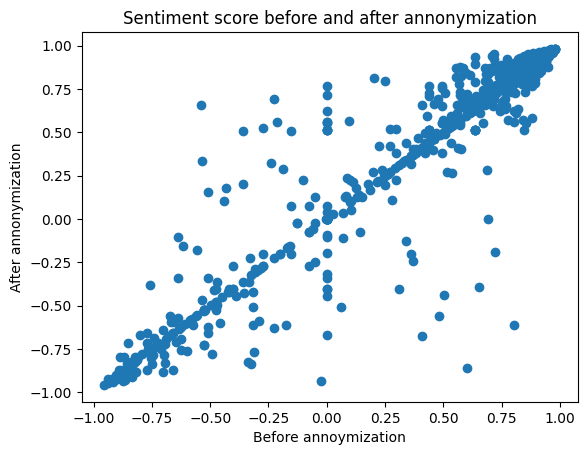

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


In [ ]:
utilization_utils.sentiment_test(df_2, 'txt')

0.7771153846153847

In [ ]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

0.806923076923077